In [1]:
# Requirements
# python = 3.6.2
# pynwb = 1.0.1

In [2]:
#################################
# NWB Packages
#################################

import numpy
import pynwb
from pynwb import NWBFile, TimeSeries, get_manager
from pynwb.spec import NWBGroupSpec, NWBDatasetSpec, NWBNamespace
from pynwb.base import ProcessingModule
from pynwb.ecephys import ElectrodeGroup, Device
from pynwb.image import ImageSeries
from pynwb.core import set_parents
from pynwb import *
from datetime import datetime
from pynwb import NWBFile #, TimeSeries, get_manager

In [3]:
#################################
# neo Packages
#################################

import neo
from neo import *
print ("neo.__version__ = ", neo.__version__)

import urllib
import numpy as np
import quantities as pq
from matplotlib import pyplot
import matplotlib.pyplot as plt

neo.__version__ =  0.8.0.dev


In [4]:
#################################
# NWB File
# http://download.alleninstitute.org/informatics-archive/prerelease/
# H19.28.012.11.05-2.nwb
#################################

# Read the NWB File
filename = "/home/elodie/NWB_Files/NWB_org/H19.28.012.11.05-2.nwb"
io2 = pynwb.NWBHDF5IO(filename, mode='r')

In [5]:
# An other way to read the NWB file
container = io2.read()
#print("container = ", container)

neurodata_type =  VoltageClampSeries
file =  {
    "cycle_id": 2001001,
    "file": "H19.28.012.11.05.dat",
    "group_label": "PGS4_190418_701_A01",
    "series_label": "extpinbath",
    "sweep_label": ""
}
desc =  extpinbath
rate =  199999.99999999997
gain =  5000000.0
capacitance_fast =  0.0
capacitance_slow =  nan
resistance_comp_bandwidth =  nan
resistance_comp_correction =  nan
resistance_comp_prediction =  nan
whole_cell_capacitance_comp =  nan
whole_cell_series_resistance_comp =  nan
data.data =  <HDF5 dataset "data": shape (70000,), type "<f4">
   
current =  [5.3944289e-09 5.4000515e-09 5.3981775e-09 ... 6.1628307e-09 6.1647047e-09
 6.1672036e-09]
current_shape =  (70000,)
starting_time =  13008.059839
current_shape[0] =  70000
temps[j] =  [13008.059839 13008.059844 13008.059849 ... 13008.409824 13008.409829
 13008.409834]


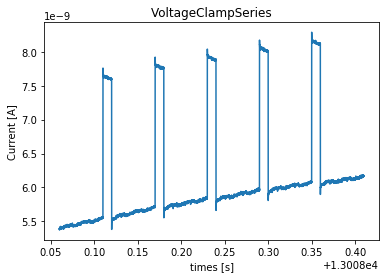

In [6]:
# VoltageClampSeries
# Current vs time
    
for i in container.acquisition:

    if i=='index_000':
        print("neurodata_type = ", container.get_acquisition(i).neurodata_type)
        print("file = ", container.get_acquisition(i).description)
        print("desc = ", container.get_acquisition(i).stimulus_description)
        print("rate = ", container.get_acquisition(i).rate) # Hz
        print("gain = ", container.get_acquisition(i).gain) # x
        print("capacitance_fast = ", container.get_acquisition(i).capacitance_fast) # F
        print("capacitance_slow = ", container.get_acquisition(i).capacitance_slow)
        print("resistance_comp_bandwidth = ", container.get_acquisition(i).resistance_comp_bandwidth)
        print("resistance_comp_correction = ", container.get_acquisition(i).resistance_comp_correction)
        print("resistance_comp_prediction = ", container.get_acquisition(i).resistance_comp_prediction)
        print("whole_cell_capacitance_comp = ", container.get_acquisition(i).whole_cell_capacitance_comp)
        print("whole_cell_series_resistance_comp = ", container.get_acquisition(i).whole_cell_series_resistance_comp)        
        print("data.data = ", container.get_acquisition(i).data)
        print("   ")
        print("current = ", container.get_acquisition(i).data[:])
        print("current_shape = ", container.get_acquisition(i).data.shape)
        print("starting_time = ",container.get_acquisition(i).starting_time)
 
        current_shape = container.get_acquisition(i).data.shape[0]
        print("current_shape[0] = ", current_shape)
        temps = np.zeros(current_shape)
        for j in range(0, current_shape):
            temps[j]=1./container.get_acquisition(i).rate*j+container.get_acquisition(i).starting_time
            
        print("temps[j] = ", temps)
        
        plt.plot(temps, container.get_acquisition(i).data[:])
        plt.xlabel('times [s]')
        plt.ylabel('Current [%s]' %container.get_acquisition(i).unit) 
        plt.title('%s' %container.get_acquisition(i).neurodata_type)
        plt.show()   


neurodata_type =  VoltageClampStimulusSeries
desc =  extpinbath
rate =  199999.99999999997
gain =  1.0
data.data =  <HDF5 dataset "data": shape (69995,), type "<f4">
voltage_shape[0] =  69995
temps_voltage =  [13008.059839 13008.059844 13008.059849 ... 13008.409799 13008.409804
 13008.409809]


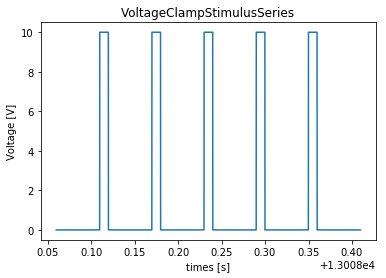

In [7]:
# VoltageClampStimulusSeries
# Voltage vs time

for i in container.stimulus:

    if i=='index_000':
        print("neurodata_type = ", container.get_stimulus(i).neurodata_type)
        #print("file = ", container.get_stimulus(i).description)
        print("desc = ", container.get_stimulus(i).stimulus_description)
        print("rate = ", container.get_stimulus(i).rate) # Hz
        print("gain = ", container.get_stimulus(i).gain) # x
        print("data.data = ", container.get_stimulus(i).data)        
 
        voltage_shape = container.get_stimulus(i).data.shape[0]
        print("voltage_shape[0] = ", voltage_shape)
        temps_voltage = np.zeros(voltage_shape)
        for k in range(0, voltage_shape):
            temps_voltage[k]=1./container.get_stimulus(i).rate*k+container.get_stimulus(i).starting_time
        print("temps_voltage = ", temps_voltage)
        
        plt.plot(temps_voltage, container.get_stimulus(i).data[:])
        plt.xlabel('times [s]')
        plt.ylabel('Voltage [%s]' %container.get_stimulus(i).unit) 
        plt.title('%s' %container.get_stimulus(i).neurodata_type)
       
        plt.show()   


i =  index_000
ii =  index_000


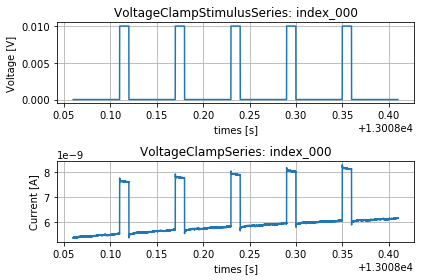

i =  index_001
ii =  index_001


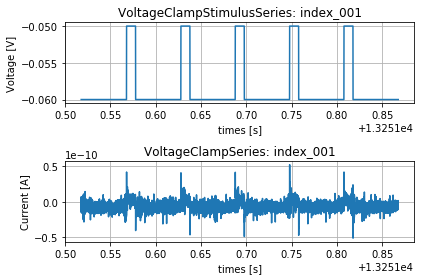

i =  index_002
ii =  index_002


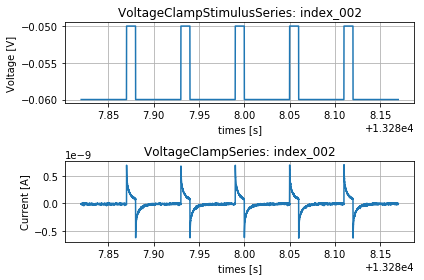

i =  index_003
ii =  index_003


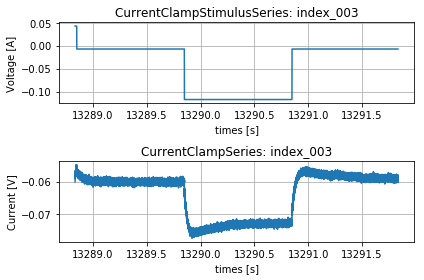

i =  index_004
ii =  index_004


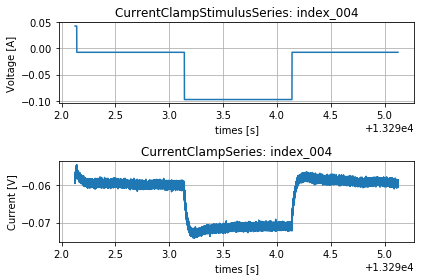

i =  index_005
ii =  index_005


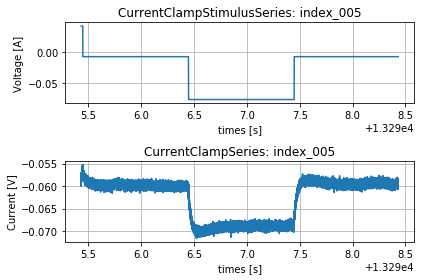

i =  index_006
ii =  index_006


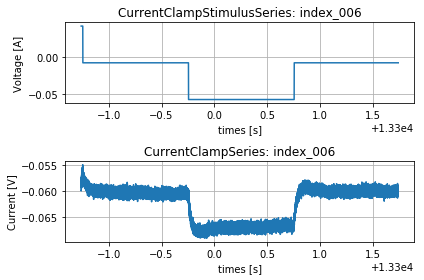

i =  index_007
ii =  index_007


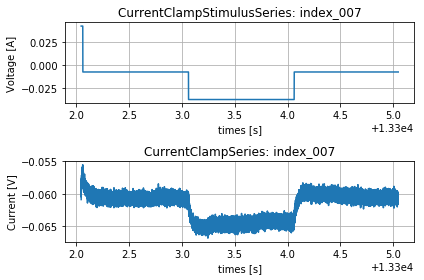

i =  index_008
ii =  index_008


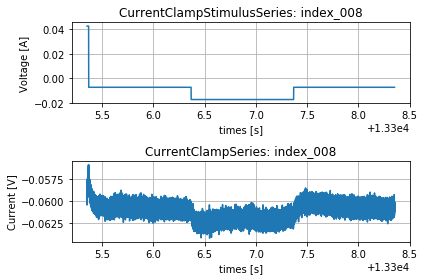

i =  index_009
ii =  index_009


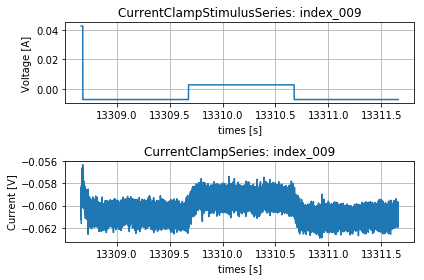

i =  index_010
ii =  index_010


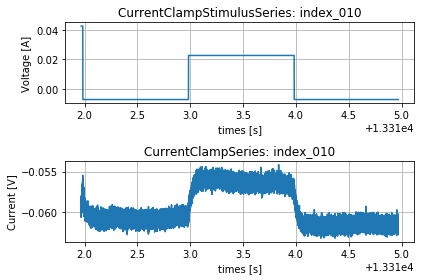

i =  index_011
ii =  index_011


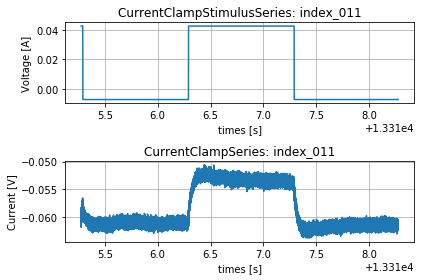

i =  index_012
ii =  index_012


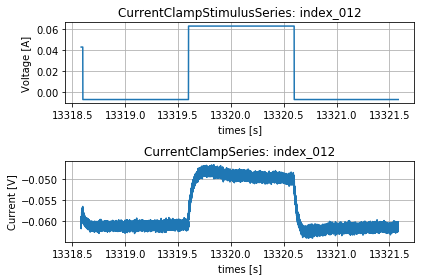

i =  index_013
ii =  index_013


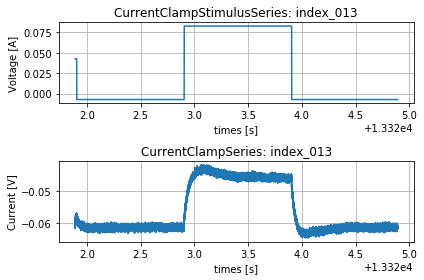

i =  index_014
ii =  index_014


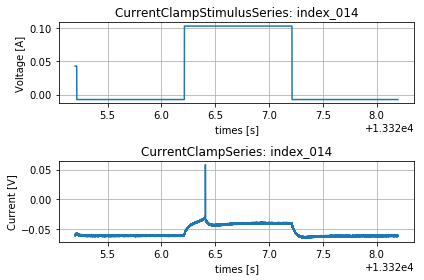

i =  index_015
ii =  index_015


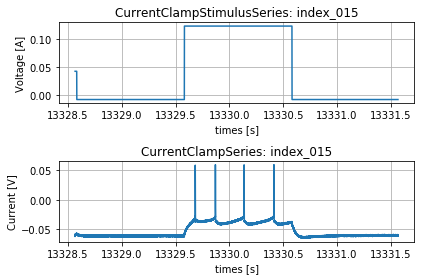

i =  index_016
ii =  index_016


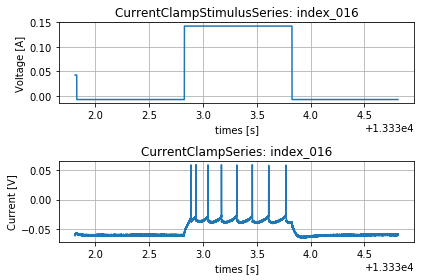

i =  index_017
ii =  index_017


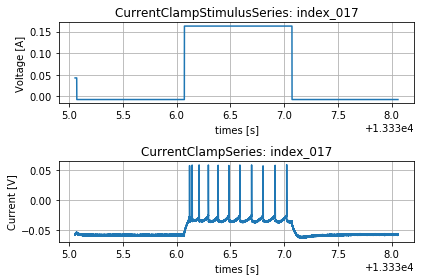

i =  index_018
ii =  index_018


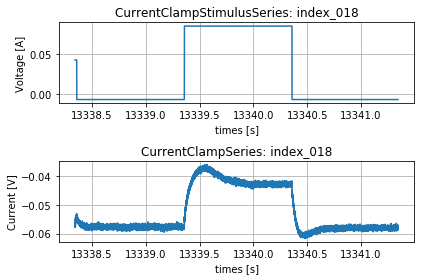

i =  index_019
ii =  index_019


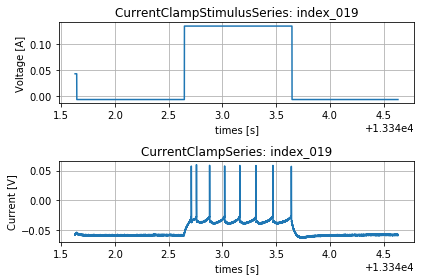

i =  index_020
ii =  index_020


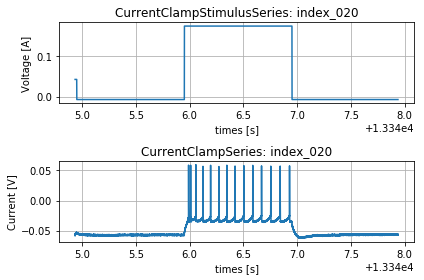

i =  index_021
ii =  index_021


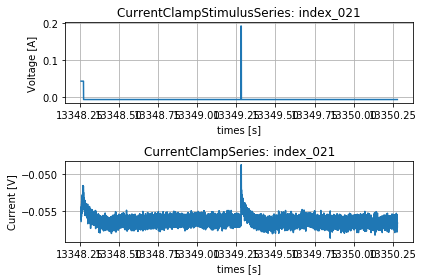

i =  index_022
ii =  index_022


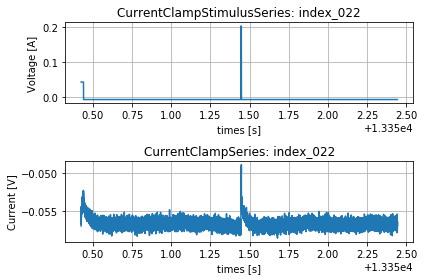

i =  index_023
ii =  index_023


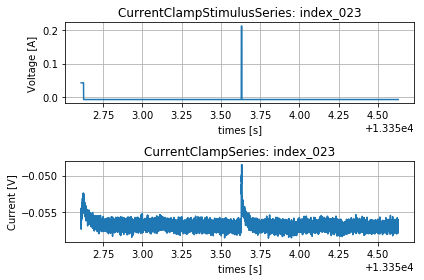

i =  index_024
ii =  index_024


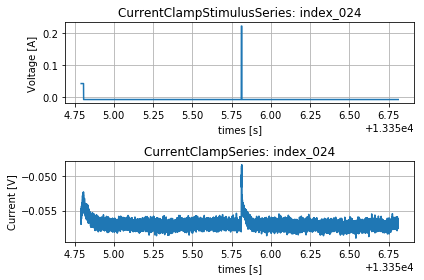

i =  index_025
ii =  index_025


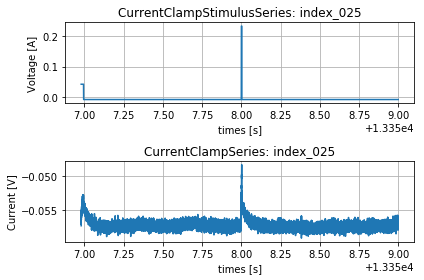

i =  index_026
ii =  index_026


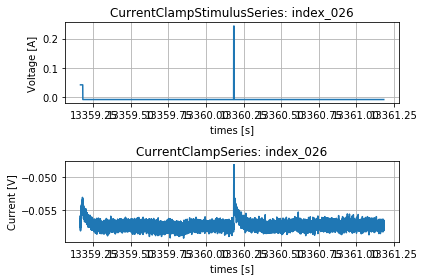

i =  index_027
ii =  index_027


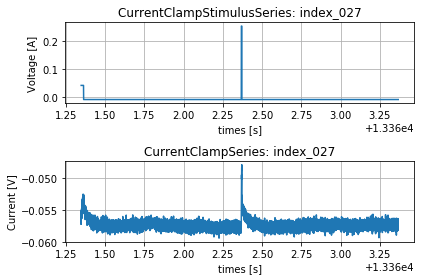

i =  index_028
ii =  index_028


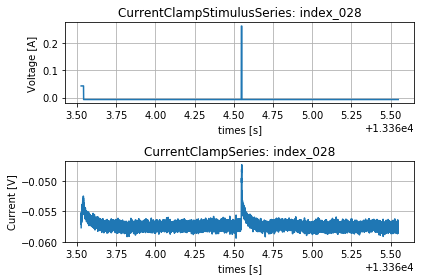

i =  index_029
ii =  index_029


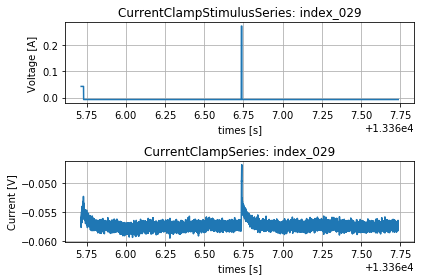

i =  index_030
ii =  index_030


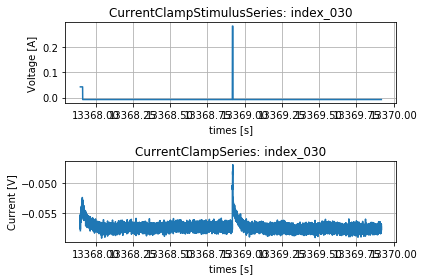

i =  index_031
ii =  index_031


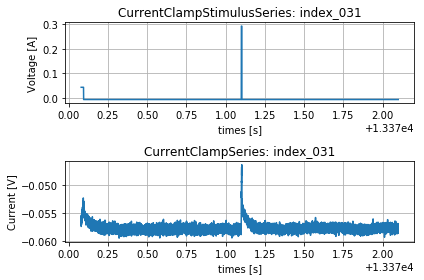

i =  index_032
ii =  index_032


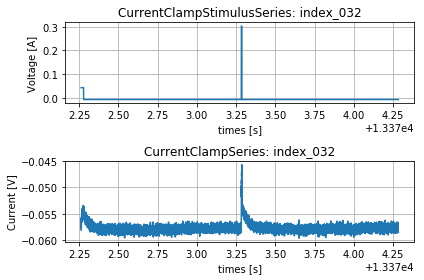

i =  index_033
ii =  index_033


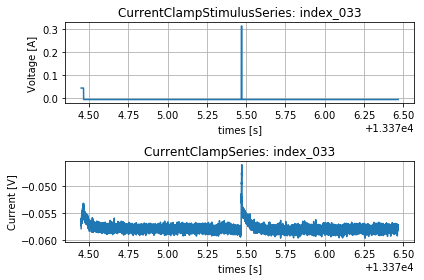

i =  index_034
ii =  index_034


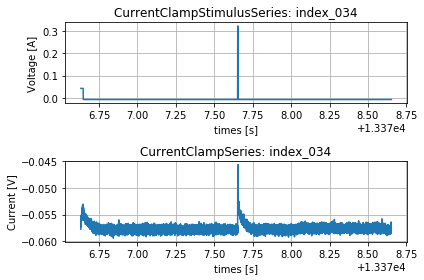

i =  index_035
ii =  index_035


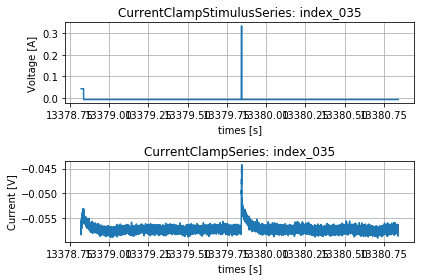

i =  index_036
ii =  index_036


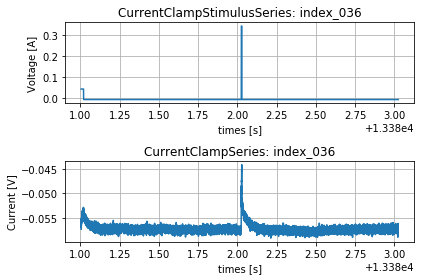

i =  index_037
ii =  index_037


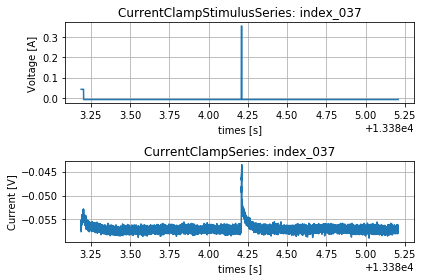

i =  index_038
ii =  index_038


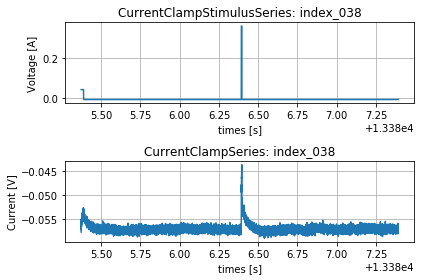

i =  index_039
ii =  index_039


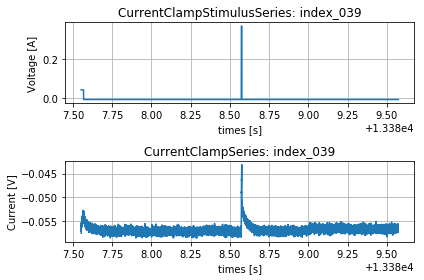

i =  index_040
ii =  index_040


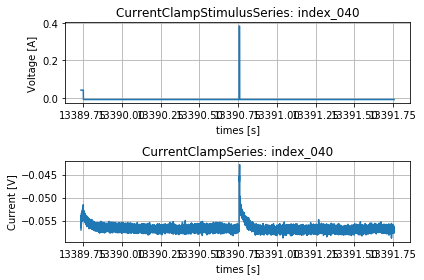

i =  index_041
ii =  index_041


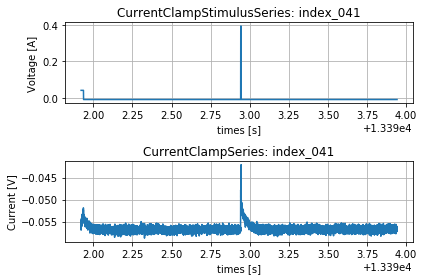

i =  index_042
ii =  index_042


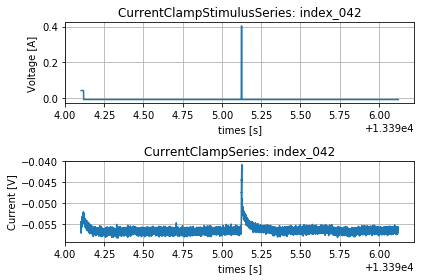

i =  index_043
ii =  index_043


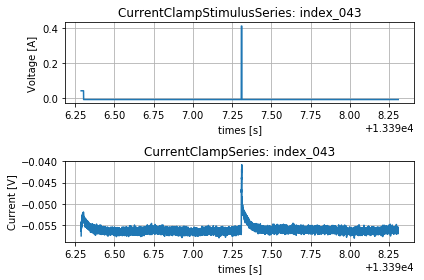

i =  index_044
ii =  index_044


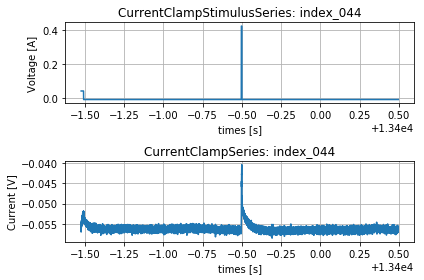

i =  index_045
ii =  index_045


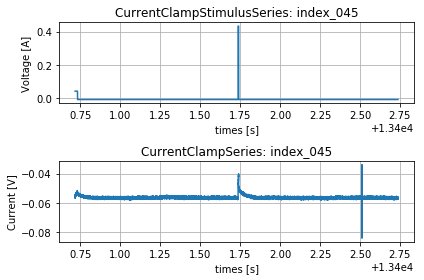

i =  index_046
ii =  index_046


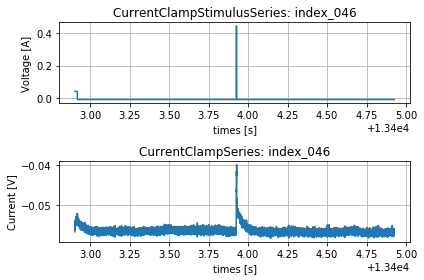

i =  index_047
ii =  index_047


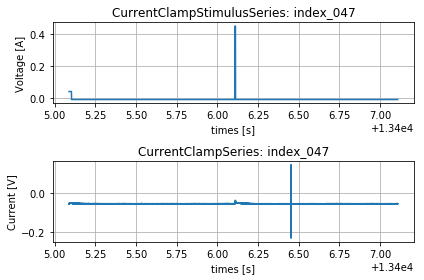

i =  index_048
ii =  index_048


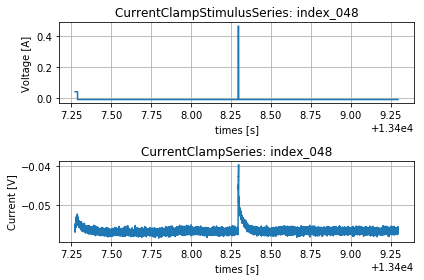

i =  index_049
ii =  index_049


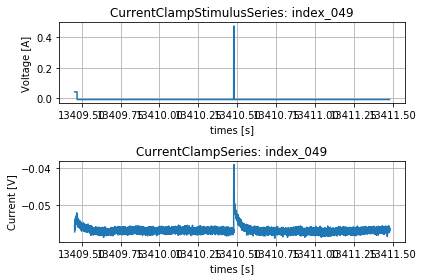

i =  index_050
ii =  index_050


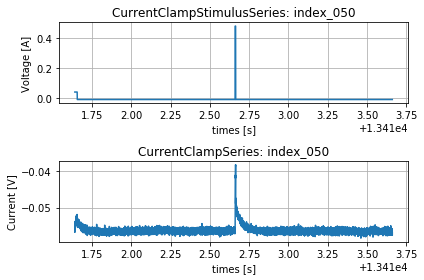

i =  index_051
ii =  index_051


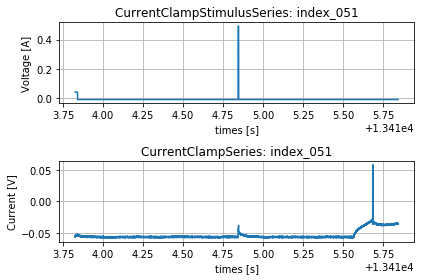

i =  index_052
ii =  index_052


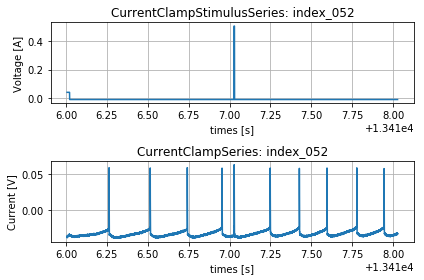

i =  index_053
ii =  index_053


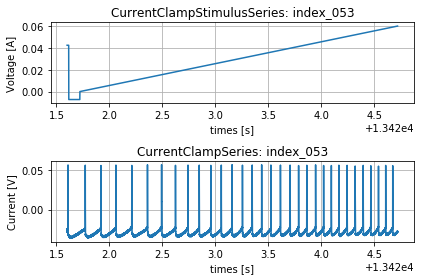

i =  index_054
ii =  index_054


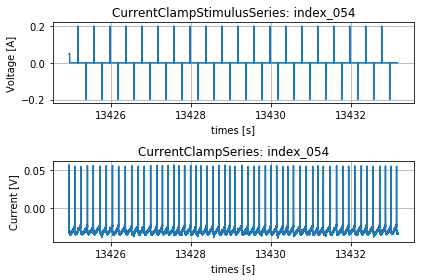

i =  index_055
ii =  index_055


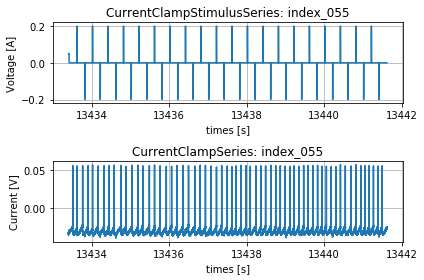

i =  index_056
ii =  index_056


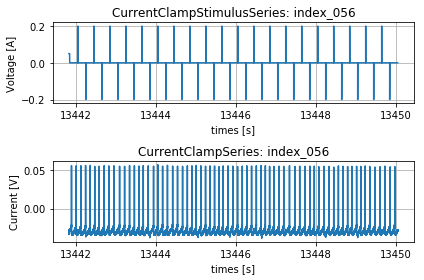

i =  index_057
ii =  index_057


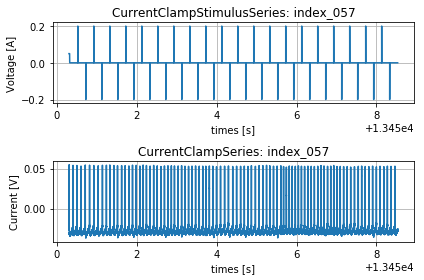

i =  index_058
ii =  index_058


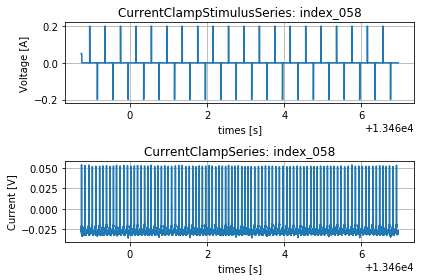

i =  index_059
ii =  index_059


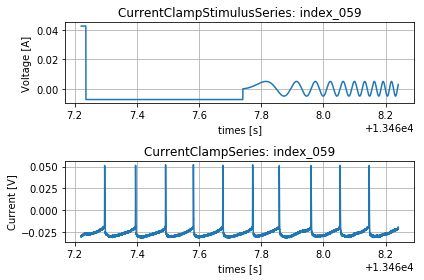

i =  index_060
ii =  index_060


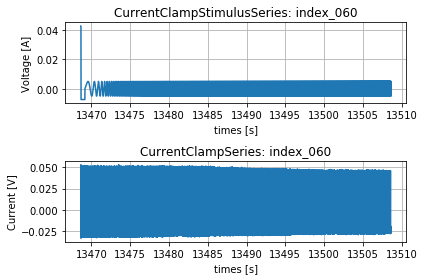

i =  index_061
ii =  index_061


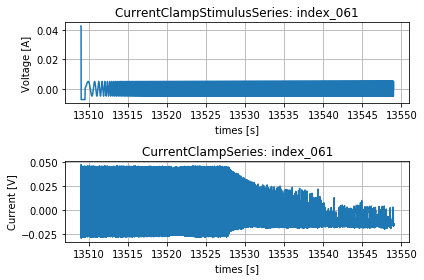

i =  index_062
ii =  index_062


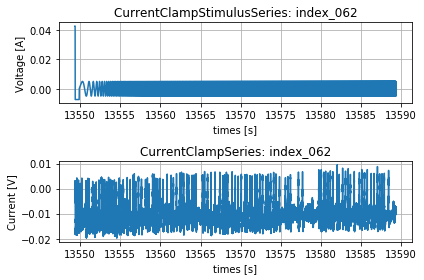

In [25]:
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('NWB_H19-2_multigraphs.pdf')

for i in container.stimulus:
#for i in ['index_000', 'index_001']: # To only have the first two

    fig = plt.figure()

    print("i = ", i)
    voltage_shape = container.get_stimulus(i).data.shape[0]
           
    temps_voltage = np.zeros(voltage_shape)
    for k in range(0, voltage_shape):
        temps_voltage[k]=1./container.get_stimulus(i).rate*k+container.get_stimulus(i).starting_time

    plt.subplot(2, 1, 1)
    plt.plot(temps_voltage, container.get_stimulus(i).data[:]/1000.)
    plt.xlabel('times [s]')
    plt.ylabel('Voltage [%s]' %container.get_stimulus(i).unit) 
    plt.title('%s: %s' %(container.get_stimulus(i).neurodata_type,i))
    plt.grid(True)
    
    print("ii = ", i)
    current_shape = container.get_acquisition(i).data.shape[0]
    temps = np.zeros(current_shape)
    for j in range(0, current_shape):
        temps[j]=1./container.get_acquisition(i).rate*j+container.get_acquisition(i).starting_time
       
    plt.subplot(2, 1, 2)
    plt.plot(temps, container.get_acquisition(i).data[:])
    plt.xlabel('times [s]')
    plt.ylabel('Current [%s]' %container.get_acquisition(i).unit) 
    plt.title('%s: %s' %(container.get_acquisition(i).neurodata_type, i))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    pp.savefig(fig)
pp.close()
    
#    #plt.savefig(pp, format='pdf')
#    pp.savefig(fig)
#    plt.clf() # clear the figure
#
#pp.close()
        